## Trained Dandelion images classification models using ResNet50


### ResNet50

ResNet50 is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer. It has 3.8 x 10^9 Floating points operations. It is a widely used ResNet model and we have explored ResNet50 architecture in depth.


[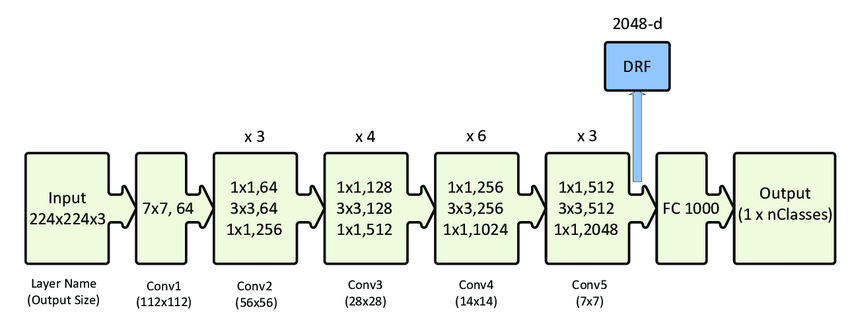](http://)




### Description

These are images of dandelions and not-dandelions. Basically grass or other. Goal of this project/images is a very simple binary image classification model for me to do some "real world learning": - Dandelions - Anything NOT dandelions


1- Images/dandelions = only images of dandelions.

2-Images/other = other, mostly grass images.

3-Images/dandelionvother = kinda' a mistake this dir gets created during training. Should be cleared out on each training.


#### Dataset:

[Link](https://www.kaggle.com/coloradokb/dandelionimages)



In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import PIL
import os
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [67]:
train_ds = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

val_ds = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

In [68]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('../input/dandelionimages/Images',
  validation_split=0.2,
  subset="training",
  seed=212,
  image_size=(224, 224),
  batch_size= 64)

Found 1262 files belonging to 2 classes.
Using 1010 files for training.


In [69]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('../input/dandelionimages/Images',
  validation_split=0.2,
  subset="validation",
  seed=212,
  image_size=(224, 224),
  batch_size= 64)

Found 1262 files belonging to 2 classes.
Using 252 files for validation.


In [70]:
class_names = train_ds.class_names
print(class_names)

['dandelion', 'other']


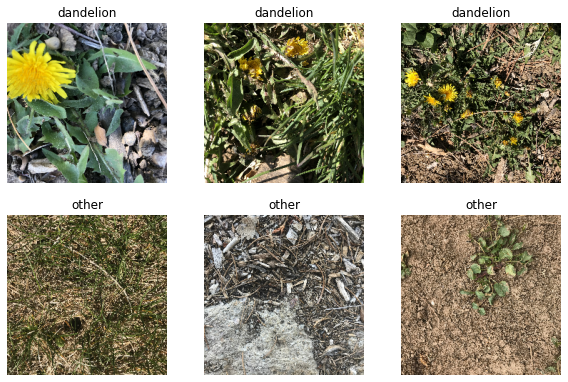

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        random_num = np.random.randint(0, len(images))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[random_num].numpy().astype("uint8"))
        plt.title(class_names[labels[random_num]])
        plt.axis("off")

In [72]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [73]:
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

In [74]:
# Freezing Layers

for layer in base_model.layers[:-5]:
    layer.trainable=False

In [75]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(2))

In [76]:
# Model Summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3211296   
_________________________________________________________________
batch_normalization_9 (Batch (None, 32)                128       
_________________________________________________________________
activation_6 (Activation)    (None, 32)               

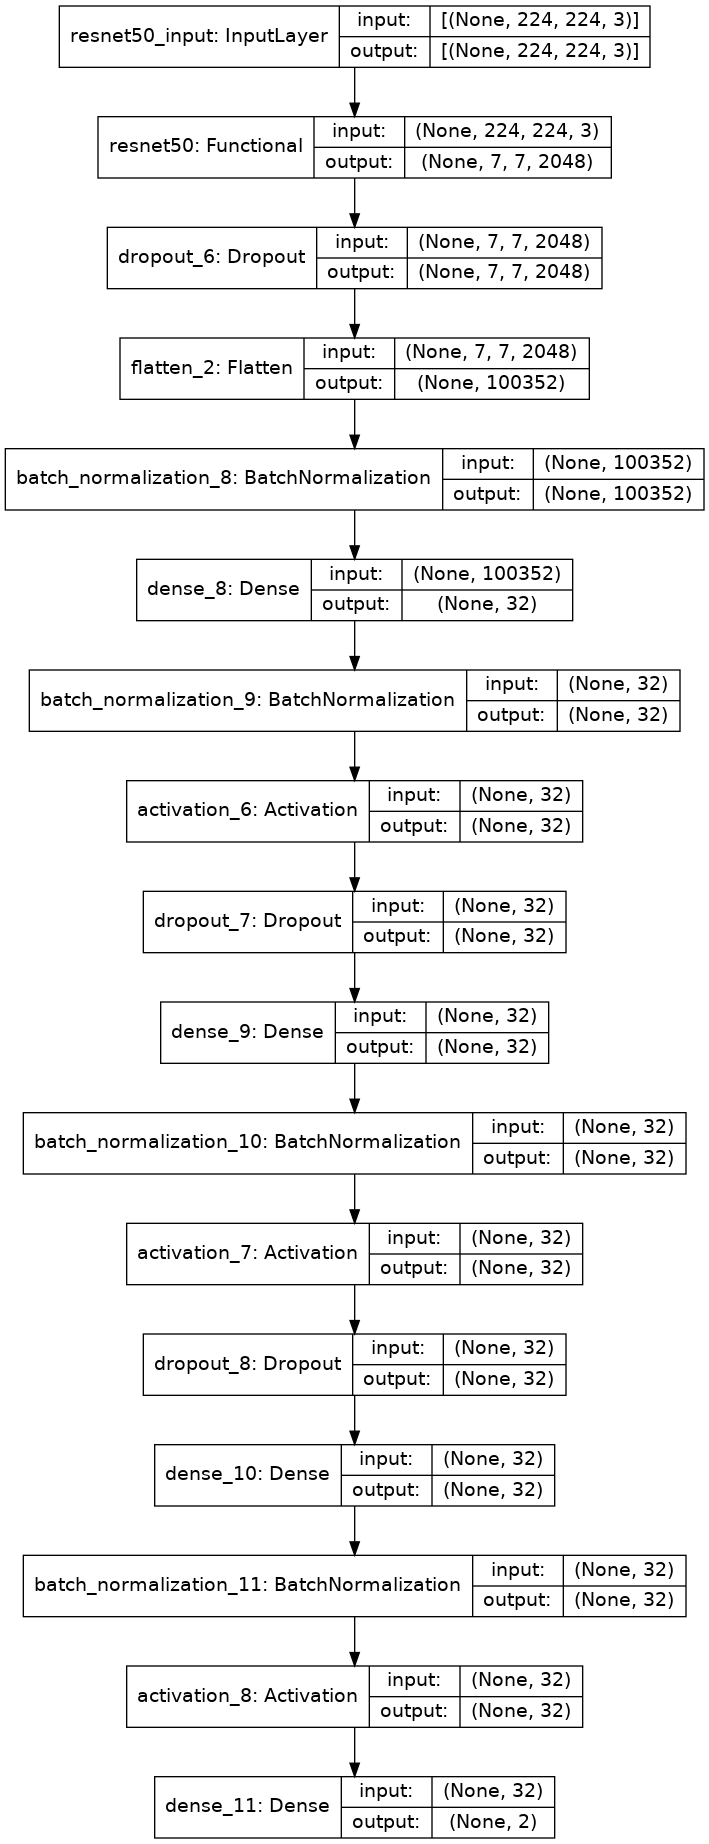

In [77]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [78]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 2,verbose = 1,factor = 0.75, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=2)

In [79]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [89]:
epochs=10

In [90]:
%time
history=model.fit(train_ds,validation_data=val_ds,epochs = epochs,verbose = 1,callbacks=[lrd,mcp,es])



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 10.7 µs
Epoch 1/10
16/16 [==============================] - 103s 7s/step - loss: 0.4541 - accuracy: 0.8139 - val_loss: 0.8803 - val_accuracy: 0.6905
Epoch 2/10
16/16 [==============================] - 133s 9s/step - loss: 0.3697 - accuracy: 0.8693 - val_loss: 0.5640 - val_accuracy: 0.7619
Epoch 3/10
16/16 [==============================] - 100s 6s/step - loss: 0.2726 - accuracy: 0.9238 - val_loss: 0.4734 - val_accuracy: 0.8095
Epoch 4/10
16/16 [==============================] - 100s 6s/step - loss: 0.2095 - accuracy: 0.9426 - val_loss: 0.3972 - val_accuracy: 0.8214
Epoch 5/10
16/16 [==============================] - 101s 6s/step - loss: 0.1710 - accuracy: 0.9594 - val_loss: 0.3896 - val_accuracy: 0.8373
Epoch 6/10
16/16 [==============================] - 99s 6s/step - loss: 0.1348 - accuracy: 0.9653 - val_loss: 0.3926 - val_accuracy: 0.8571
Epoch 7/10
16/16 [==============================] - 101s 6s/step - loss: 0.1022 - accuracy:

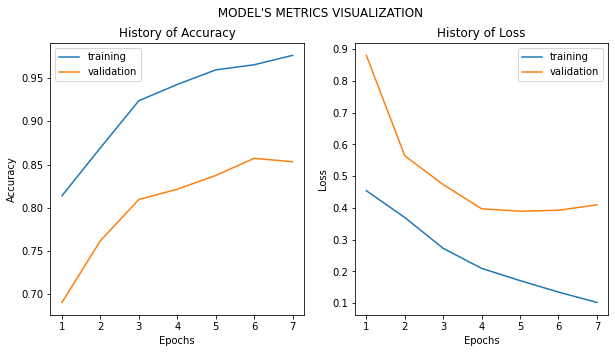

In [92]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(accuracy,val_accuracy,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
  


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],

              )